# COGS 108 - EDA Checkpoint

# Names

- Nhan Quach
- Joseph Morales
- Victor Wang
- Kevin Hu
- Areen Lu

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

# Setup

In [8]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

#import stat models
from sklearn import svm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data Cleaning

Describe your data cleaning steps here.

In [7]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

## Profane Words Data

In [16]:
df = pd.read_csv('cleaned_data/movie_profane_words_count.csv')
df.head()

,id,bastard,bitch,crap,cunt,damn,fuck,shit,total
0,377062,2,1,2,0,6,1,30,42
1,1189340,1,10,0,0,7,4,18,40
2,120828,0,3,1,0,3,1,13,21
3,338013,0,1,5,0,7,30,18,61
4,460989,28,1,1,1,1,46,8,86


The data presented counts the number of profane words in each movie (represented by id) script. Each column counts the specified word and any words that contain the word as a substring. In order to collect this data, we made use of regular expressions in the form * word *, where the asterisks are quantifiers indicating there are zero or more characters preceeding and proceeding the root word. For example, words such as 'motherf-ker', 'f-ker', 'f-king', and 'f-k' would all be counted the same column.

In [38]:
column_sums = df.iloc[:, 1:-1].sum()
print(column_sums)

bastard     2151
bitch       6914
crap        2338
cunt         612
damn       12955
fuck       61301
shit       31998
dtype: int64


By counting the total number of words it each column, it is evident that the most commonly used words are 'sh-t', 'f-k', and 'd-mn'. The usage of these three words are approximately 10 times more frequent than other words on the list.

Text(0.5, 1.0, 'Frequency of Profane Words')

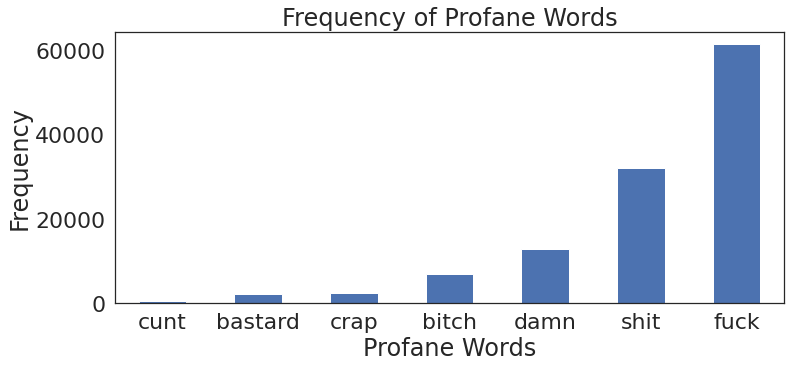

In [64]:
column_sums_sorted = column_sums.sort_values(ascending=True)
plt = column_sums_sorted.plot(kind='bar', rot=0)
plt.set_xlabel('Profane Words')
plt.set_ylabel('Frequency')
plt.set_title('Frequency of Profane Words')

From this chart, it is evident that the word 'f-k' is the the most frequently used word. The usage of this word is greater than the second and third words combined.

Text(0.5, 1.0, 'Most Used Word vs Total Words')

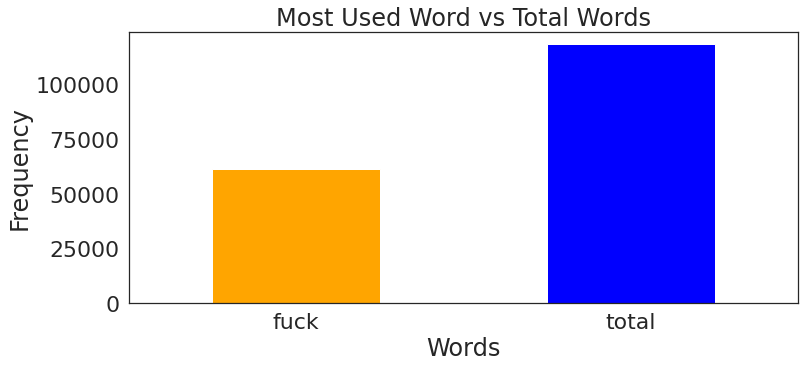

In [65]:
f_word_count = df['fuck'].sum()
total_word_count = df['total'].sum()

quantities = pd.Series([f_word_count, total_word_count], index=['fuck', 'total'])

colors = ['orange', 'blue']
plt = quantities.plot(kind='bar', color=colors,  rot = 0)

plt.set_xlabel('Words')
plt.set_ylabel('Frequency')
plt.set_title('Most Used Word vs Total Words')

Comparing the total count of all profane words to the the total count of 'f-k', it can be seen how frequently this word appears. It accounts for approximately 60% of all profane words used.

In [4]:
dfWords  = pd.read_csv('cleaned_data/movie_profane_words_count.csv')
dfMeta = pd.read_csv("cleaned_data/cleaned_metadata_2023-03-10_20-36-27.csv")
dfMeta = dfMeta.rename(columns={"imdbId":"id"})
dfMeta["id"] = pd.to_numeric(dfMeta["id"])
dfWords["id"] = pd.to_numeric(dfWords["id"])
dfTotal = pd.merge(dfMeta,dfWords, on = "id")

In [ ]:
swearCountsMean = pd.DataFrame(dfTotal.groupby('release_date').mean()['total'])
sns.lineplot(data = swearCountsMean, x = "release_date", y = "total")

In [ ]:
ratingsCountsMean = pd.DataFrame(dfTotal.groupby('release_date').mean()['rating'])
sns.lineplot(data = ratingsCountsMean, x = "release_date", y = "rating")

In [ ]:
boxCountsMean = pd.DataFrame(dfTotal.groupby('release_date').mean()['revenue'])
sns.lineplot(data = boxCountsMean, x = "release_date", y = "revenue")

In [6]:
dfTotal['normTotal'] = dfTotal['total']/dfTotal['script_size']
dfPredict = dfTotal.drop([254])

In [9]:
regr = svm.SVR()
regr.fit(dfPredict['rating'].values.reshape(-1,1),dfPredict['normTotal'].values.reshape(-1,1))
regr.predict([[0.000113]])

/Users/victorwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00924813])

In [10]:
x = dfPredict['normTotal']
y = dfPredict['rating']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.189
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0742
Time:                        13:31:26   Log-Likelihood:                -1815.3
No. Observations:                2943   AIC:                             3635.
Df Residuals:                    2941   BIC:                             3647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2032      0.010    310.072      0.0

In [14]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X = sm.add_constant(X)
    result = sm.OLS(Y, X).fit()
    return result.params

dfPredict.groupby('release_date').apply(regress, 'rating', 'normTotal')

ValueError: The indices for endog and exog are not aligned